<a href="https://colab.research.google.com/github/AlameenWazz/Machine-Learning-with-Apache-Spark/blob/main/Module_1_3_Metrics_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Metrics for Regression


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to evaluate a regression model using various metrics.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
<li><a href="#Task-3---Split-the-data-set">Task 3 - Split the data set</a></li>
    <li><a href="#Task-4---Build-and-Train-a-Linear-Regression-Model">Task 4 - Build and Train a Linear Regression Model</a></li>
        <li><a href="#Task-5---Evaluate-the-model">Task 5 - Evaluate the model</a></li>    
        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3 - Split the data</a></li>
    <li><a href="#Exercise-4---Predict-values">Exercise 4 - Predict values</a></li>
    <li><a href="#Exercise-5---Evaluate-the-model">Exercise 5 - Evaluate the model</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Split the dataset into training and testing sets.
 - Use Linear Regression to build a prediction model.
 - Use metrics to evaluate the model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/auto+mpg
 - Modified version of diamonds dataset. Original dataset available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active



----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4
# !pip install scikit-learn==0.20.1
# !pip install numpy==1.21.6

In [2]:
# You can use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


### Importing Required Libraries

Import all required libraries in one place (here):_


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

#import functions for train test split

from sklearn.model_selection import train_test_split

# import functions for metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

## Task 1 - Load the data in a csv file into a dataframe


In [4]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)


Let's look at some sample rows from the dataset we loaded:


In [6]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
241,26.0,4,97.0,75,2265,18.2,77,Japanese
381,36.0,4,105.0,74,1980,15.3,82,European
368,26.0,4,156.0,92,2585,14.5,82,American
223,18.5,6,250.0,98,3525,19.0,77,American
200,13.0,8,318.0,150,3940,13.2,76,American


from matplotlib import pyplot as plt
_df_0['MPG'].plot(kind='hist', bins=20, title='MPG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cylinders'].plot(kind='hist', bins=20, title='Cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Engine Disp'].plot(kind='hist', bins=20, title='Engine Disp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Horsepower'].plot(kind='hist', bins=20, title='Horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Origin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MPG', y='Cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Cylinders', y='Engine Disp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Engine Disp', y='Horsepower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Horsepower', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cylinders']
  ys = series['MPG']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Cylinders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Origin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Origin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cylinders')
_ = plt.ylabel('MPG')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cylinders']
  ys = series['Horsepower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Cylinders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Origin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Origin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cylinders')
_ = plt.ylabel('Horsepower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cylinders']
  ys = series['Weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Cylinders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Origin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Origin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cylinders')
_ = plt.ylabel('Weight')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cylinders']
  ys = series['Accelerate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Cylinders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Origin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Origin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cylinders')
_ = plt.ylabel('Accelerate')

from matplotlib import pyplot as plt
_df_13['MPG'].plot(kind='line', figsize=(8, 4), title='MPG')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Cylinders'].plot(kind='line', figsize=(8, 4), title='Cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Engine Disp'].plot(kind='line', figsize=(8, 4), title='Engine Disp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Horsepower'].plot(kind='line', figsize=(8, 4), title='Horsepower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Origin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='MPG', y='Origin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Origin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Cylinders', y='Origin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Origin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Engine Disp', y='Origin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Origin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Horsepower', y='Origin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Let's find out the number of rows and columns in the dataset:


In [7]:
df.shape

(392, 8)

Let's create a scatter plot of Weight versus mileage(MPG) . This will help us visualize the relationship between them.


<Axes: xlabel='Weight', ylabel='MPG'>

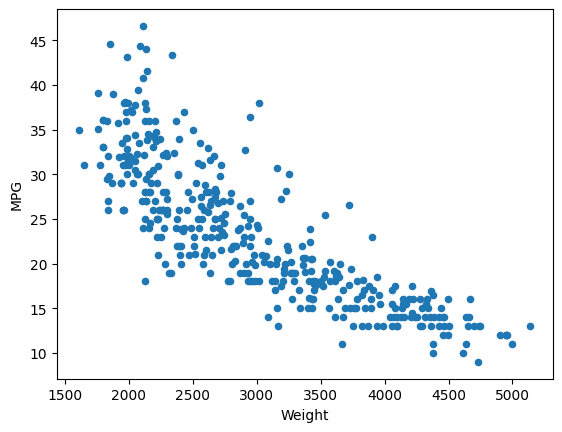

In [8]:
df.plot.scatter(x = "Weight", y = "MPG")

You are encouraged to create more plots to visualize relationships amongst other columns


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [9]:
y = df["MPG"] # y is the target

We identify the features next. Features are the values our machine learning model learns from


In [10]:
X = df[["Horsepower","Weight"]] # X is the set of features

## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The random_state variable controls the shuffling applied to the data before applying the split. Pass the same integer for reproducible output across multiple function calls


## Task 4 - Build and Train a Linear Regression Model


Create a LR model


In [12]:
lr = LinearRegression()

Train/Fit the model using the training data set


In [13]:
lr.fit(X_train,y_train)

LinearRegression()

## Task 5 - Evaluate the model


Your model is now trained. We use the testing data to evaluate the model.


In [14]:
lr.score(X_test, y_test)

0.7691968626070728

To compute the detailed metrics we need two values, the original mileage and the predicted mileage.


In [15]:
original_values = y_test
predicted_values = lr.predict(X_test)

##### R Squared


In [16]:
r2_score(original_values, predicted_values) # Higher the value the better the model

0.7691968626070728

##### Mean Squared Error


In [17]:
mean_squared_error(original_values, predicted_values) # Lower the value the better the model

12.21274893832399

##### Root Mean Squared Error


In [18]:
sqrt(mean_squared_error(original_values, predicted_values)) # Lower the value the better the model

3.4946743679953918

##### Mean Absolute Error


In [19]:
mean_absolute_error(original_values, predicted_values) # Lower the value the better the model

2.8530678815092534

# Exercises


In [20]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [21]:
df2 = pd.read_csv(URL2)

### Exercise 2 - Identify the target column and the data columns


 - Use the price column as target
 - Use the columns carat, depth and table as features


In [22]:
y = df2["price"]
X = df2[["carat","depth","table"]]

### Exercise 3 - Split the data


Split the dataset into training and testing sets. Make 25% of the data as testing set. Use 42 as random state.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Exercise 4 - Predict values


In [24]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

Predict the values using the test data.


In [25]:
original_values = y_test
predicted_values = lr2.predict(X_test)

### Exercise 5 - Evaluate the model


Print the metrics :
- R squared
- mean absolute error
- mean squared error
- root mean squared error


In [26]:
print(r2_score(original_values, predicted_values))
print(mean_absolute_error(original_values, predicted_values))
print(mean_squared_error(original_values, predicted_values))
print(sqrt(mean_squared_error(original_values, predicted_values)))

0.852949398522144
991.8625215831571
2310119.635474932
1519.9077720292544


Congratulations you have completed this lab.<br>


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-15|0.1|Ramesh Sannareddy|Initial Version Created|


Copyright © 2023 IBM Corporation. All rights reserved.
